<a href="https://colab.research.google.com/github/Ravenha/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Bethany_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
# Import libraries
import pandas as pd
import requests
import urllib.request
import time
import re
import matplotlib.pyplot as plt
from collections import OrderedDict
from datetime import date
from requests import get
from requests.exceptions import RequestException
from contextlib import closing
from bs4 import BeautifulSoup
from itertools import groupby
from math import sqrt
from numpy import linalg as LA
from mpl_toolkits import mplot3d
from numpy.linalg import matrix_rank

In [3]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
sales

[3505, 2400, 3027, 2798, 3700, 3250, 2689]

In [0]:
def meanNorm(numlist):
    try:
        return sum(numlist)/len(numlist)
    except:
        print('TypeError.')

        
def varStd(numlist, set_type='sample'):
    assert (set_type=='sample') or (set_type=='population')
    
    def nTerm():
        if set_type == 'sample':
            return len(numlist)-1
        elif set_type == 'population':
            return len(numlist)
        
    def sqTerm():
        list_mean = meanNorm(numlist)
        sum_diff_sq = 0
        for item in numlist:
            sum_diff_sq += (item-list_mean)**2
        return sum_diff_sq
    
    return sqTerm()/nTerm(), sqrt(sqTerm()/nTerm())

In [0]:
mean = meanNorm(sales)
var, std = varStd(sales, set_type='sample')
print(mean, var, std)

3052.714285714286 214387.90476190473 463.0204150595357


In [0]:
pd.Series(sales).std()

463.0204150595357

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
def cov(list1, list2, set_type='sample'):
    assert (set_type=='sample') or (set_type=='population')
    assert len(list1) == len(list2)
    
    def nTerm():
        if set_type == 'sample':
            return len(list1)-1
        elif set_type == 'population':
            return len(list1)
    
    def sqTerm():
        list1_mean = meanNorm(list1)
        list2_mean = meanNorm(list2)
        sum_diff_sq = 0
        for count, _ in enumerate(list1):
            sum_diff_sq += ((list1[count]-list1_mean)) * ((list2[count]-list2_mean))
        return sum_diff_sq
    
    return sqTerm()/nTerm()

In [0]:
customers = [127, 80, 105, 92, 120, 115, 93]
cov(sales,customers)

7604.357142857142

In [0]:
pd.Series(sales).cov(pd.Series(customers))

7604.357142857142

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
_, customer_std = varStd(customers, set_type='sample')
_, sales_std = varStd(sales, set_type='sample')

print(customer_std, sales_std)

corr_coef = cov(sales,customers) / (customer_std*sales_std)
print(corr_coef)

17.057326313123664 463.0204150595357
0.9628339778148909


In [0]:
pd.Series(sales).corr(pd.Series(customers))

0.9628339778148909

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
link = "https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv"

In [0]:
df = pd.read_csv(link)
df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [0]:
import numpy as np
cat_cols = ['sex', 'embarked', 'home.dest']
clean_data = df.copy()

for col in cat_cols:
    clean_data[col] = df[col].astype('category')

In [0]:
from pandas.api.types import CategoricalDtype

def get_level(x):
    if type(x) == str:
        return x[0]
    else:
        return np.nan

cat_type = CategoricalDtype(categories=clean_data['cabin'].dropna().apply(get_level).unique().tolist(), ordered=True)

clean_data['level'] = clean_data['cabin'].apply(get_level).astype(cat_type)

In [0]:
clean_data.describe()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
count,1310.000000,1309.000000,1309.000000,1310.000000,1309.000000,1309.000000,1308.000000,121.000000,1310.000000
mean,655.500000,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917,0.225191
std,378.308736,0.837836,0.486055,12.878277,1.041658,0.865560,51.758668,97.696922,0.417867
min,1.000000,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000,0.000000
25%,328.250000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,72.000000,0.000000
50%,655.500000,3.000000,0.000000,29.881135,0.000000,0.000000,14.454200,155.000000,0.000000
75%,982.750000,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,256.000000,0.000000
max,1310.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


In [0]:
clean_data.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

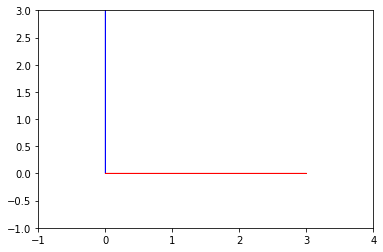

In [0]:
y = np.array([0,3])
x = np.array([3,0])

plt.arrow(0,0,dx=y[0],dy=y[1], color='blue')
plt.arrow(0,0,dx=x[0],dy=x[1], color='red')
plt.xlim(-1,4)
plt.ylim(-1,3)
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
a = np.array([-5,3,7])
b = np.array([6,-8,2])

a.dot(b)

-40

 They are not orthogonal because they are not perpindicular 

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c = np.array([2, -15, 6, 20])
c1 = c[np.newaxis]
print('Magnitude: ', LA.norm(c))
print('Dotted with Self: ', c.dot(c))
print('C.transpose x C:\n', np.matmul(c1.T,c1))

Magnitude:  25.787593916455254
Dotted with Self:  665
C.transpose x C:
 [[   4  -30   12   40]
 [ -30  225  -90 -300]
 [  12  -90   36  120]
 [  40 -300  120  400]]


In [0]:
np.matmul(c1.T,c1).T

array([[   4,  -30,   12,   40],
       [ -30,  225,  -90, -300],
       [  12,  -90,   36,  120],
       [  40, -300,  120,  400]])

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = 7*\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12*\begin{bmatrix} 0 \\ 1 \end{bmatrix}
\end{align}
\begin{align}
e = 2*\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11*\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} + -8*\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} 
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
f = np.array([4, 12, 11, 9, 2])
f_unit = f * 1/LA.norm(f)
f_unit

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

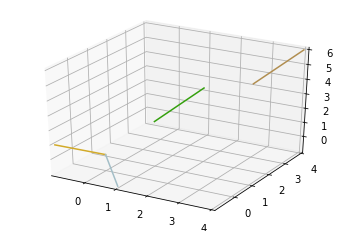

In [0]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_ylim([-1,4])
ax.set_xlim([-1,4])
ax.set_zlim([-1,6])
ax.set_xticks([0,1,2,3,4])
ax.set_yticks([0,1,2,3,4])
ax.set_zticks([0,1,2,3,4,5,6])

# Add 3d vectors
d = [2,1,2]
x = np.linspace(1, d[0], 5)
y = d[1]*x
z = d[2]*x
ax.plot3D(x,y,z, color=np.random.rand(3,))

x2 = x + 2
y2 = y + 2
z2 = z + 2
ax.plot3D(x2, y2, z2, color=np.random.rand(3,))

i1 = [-1,1,-1]
i2 = [1,-1,1]

ix1 = np.linspace(0, i1[0], 5)
ix2 = np.linspace(0, i2[0], 5) 
iy1 = i1[1] * ix1
iy2 = i2[1] * ix2
iz1 = i1[2] * ix1
iz2 = i1[2] * ix2

ax.plot3D(ix1, iy1, iz1, color=np.random.rand(3,))
ax.plot3D(ix2, iy2, iz2, color=np.random.rand(3,))

plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

h is dependent on g, so the span of g and h is a line c*i+2c*j

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

l,m,n are independent from each other.  Their span is all real numbers in 3 dimensions.

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



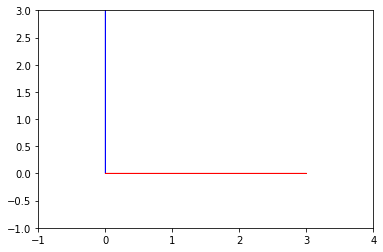

In [0]:
y = np.array([0,3])
x = np.array([3,0])

plt.arrow(0,0,dx=y[0],dy=y[1], color='blue')
plt.arrow(0,0,dx=x[0],dy=x[1], color='red')
plt.xlim(-1,4)
plt.ylim(-1,3)
plt.show()

## 6.2 What does it mean to form a basis?

Forming a basis of a coordinate system means that any point in the system may be represented by a linear combination.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

By inspection, rank(P) appears to be three, no immediate row operations can produce a zero

In [0]:
P = np.mat([[1,2,3],
            [-1,0,7],
            [4,8,2]])
matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

rank gives the maximum number of linearly independent rows or columns

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [0]:
v = np.array([1,3])
w = np.array([-1,2])

Pw = v.dot(w)/v.dot(v) * v
Pw

array([0.5, 1.5])

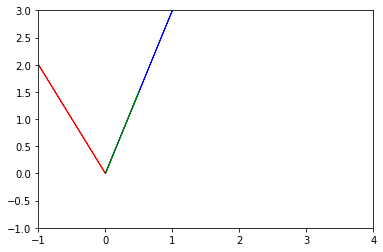

In [0]:
plt.arrow(0,0,dx=v[0],dy=v[1], color='blue')
plt.arrow(0,0,dx=w[0],dy=w[1], color='red')
plt.arrow(0,0,dx=Pw[0],dy=Pw[1], color='green')
plt.xlim(-1,4)
plt.ylim(-1,3)
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

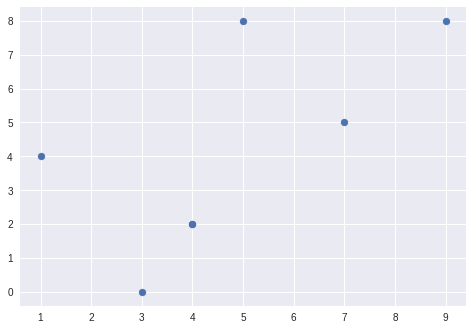

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()